# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

In [1]:
data="focused.1000.T.csv.gz"

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [3]:
#threshold=3

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.6.3'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
import sklearn
sklearn.__version__

'0.24.2'

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
default_max_columns=pd.get_option('display.max_columns')

In [16]:
default_max_rows=pd.get_option('display.max_rows')

In [17]:
default_precision=pd.get_option('display.precision')

In [18]:
pd.set_option('display.precision', 2)

In [19]:
#default_threshold=np.get_printoptions()['threshold']

In [20]:
#np.set_printoptions(threshold=10000000)

# Read raw TCGA data and cleanup

In [21]:
df=pd.read_csv(data,header=[0,1],index_col=[0,1,2,3])
df.head()

chromosome                                chr1                          \
position                               1409000 1410000 1580000 1581000   
sample            pup    hkle     mapq                                   
CS-6186-01A_gt101 paired HERVK113 Q20        8       3       5       0   
                         SVA_A    Q20        0       0       0       0   
                         SVA_B    Q20        0       0       0       0   
                         SVA_C    Q20        0       0       0       0   
                         SVA_D    Q20        0       0       0       0   

chromosome                                                              \
position                               3315000 5573000 5785000 6304000   
sample            pup    hkle     mapq                                   
CS-6186-01A_gt101 paired HERVK113 Q20        0       1       0       1   
                         SVA_A    Q20        0       0       0       0   
                         SVA_B    Q20        0       0       0       0   
                         SVA_C    Q20        0       0       0       0   
                         SVA_D    Q20        0       0       0       0   

chromosome                                              ...     chrY           \
position                               6306000 6716000  ... 12878000 12879000   
sample            pup    hkle     mapq                  ...                     
CS-6186-01A_gt101 paired HERVK113 Q20        0       0  ...        0        0   
                         SVA_A    Q20        8       5  ...        0        3   
                         SVA_B    Q20        5       3  ...        1        3   
                         SVA_C    Q20        5       3  ...        1        3   
                         SVA_D    Q20        5       3  ...        1        3   

chromosome                                                                  \
position                               13103000 13104000 19699000 19700000   
sample            pup    hkle     mapq                                       
CS-6186-01A_gt101 paired HERVK113 Q20         1        7        1        3   
                         SVA_A    Q20         0        0        0        0   
                         SVA_B    Q20         0        0        0        0   
                         SVA_C    Q20         0        0        0        0   
                         SVA_D    Q20         0        0        0        0   

chromosome                                                                  
position                               20552000 20553000 20976000 21217000  
sample            pup    hkle     mapq                                      
CS-6186-01A_gt101 paired HERVK113 Q20         0        0        0        0  
                         SVA_A    Q20         0        0        0        0  
                         SVA_B    Q20         0        0        0        0  
                         SVA_C    Q20         0        0        0        0  
                         SVA_D    Q20         0        0        0        0  

[5 rows x 5532 columns]

In [22]:
df.reset_index(inplace=True)
df.head()

chromosome             sample     pup      hkle mapq    chr1                  \
position                                             1409000 1410000 1580000   
0           CS-6186-01A_gt101  paired  HERVK113  Q20       8       3       5   
1           CS-6186-01A_gt101  paired     SVA_A  Q20       0       0       0   
2           CS-6186-01A_gt101  paired     SVA_B  Q20       0       0       0   
3           CS-6186-01A_gt101  paired     SVA_C  Q20       0       0       0   
4           CS-6186-01A_gt101  paired     SVA_D  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 3315000 5573000  ... 12878000 12879000 13103000 13104000   
0                0       0       1  ...        0        0        1        7   
1                0       0       0  ...        0        3        0        0   
2                0       0       0  ...        1        3        0        0   
3                0       0       0  ...        1        3        0        0   
4                0       0       0  ...        1        3        0        0   

chromosome                                                        
position   19699000 19700000 20552000 20553000 20976000 21217000  
0                 1        3        0        0        0        0  
1                 0        0        0        0        0        0  
2                 0        0        0        0        0        0  
3                 0        0        0        0        0        0  
4                 0        0        0        0        0        0  

[5 rows x 5536 columns]

In [23]:
df['subject']=df['sample'].str[0:7]
df['subject']

0      CS-6186
1      CS-6186
2      CS-6186
3      CS-6186
4      CS-6186
        ...   
107    DU-5872
108    DU-5872
109    DU-5872
110    DU-5872
111    DU-5872
Name: subject, Length: 112, dtype: object

In [24]:
df.columns

MultiIndex([( 'sample',         ''),
            (    'pup',         ''),
            (   'hkle',         ''),
            (   'mapq',         ''),
            (   'chr1',  '1409000'),
            (   'chr1',  '1410000'),
            (   'chr1',  '1580000'),
            (   'chr1',  '1581000'),
            (   'chr1',  '3315000'),
            (   'chr1',  '5573000'),
            ...
            (   'chrY', '12879000'),
            (   'chrY', '13103000'),
            (   'chrY', '13104000'),
            (   'chrY', '19699000'),
            (   'chrY', '19700000'),
            (   'chrY', '20552000'),
            (   'chrY', '20553000'),
            (   'chrY', '20976000'),
            (   'chrY', '21217000'),
            ('subject',         '')],
           names=['chromosome', 'position'], length=5537)

In [25]:
df=df[df['hkle']==hkle]
df.head()

chromosome                     sample     pup      hkle mapq    chr1          \
position                                                     1409000 1410000   
0                   CS-6186-01A_gt101  paired  HERVK113  Q20       8       3   
7           CS-6186-01A_gt101_trimmed  paired  HERVK113  Q20       0       0   
14                        CS-6186-01A  paired  HERVK113  Q20       8       3   
15                 CS-6186-01A_lte101  paired  HERVK113  Q20       0       0   
28                  CS-6186-10A_gt101  paired  HERVK113  Q20       5       4   

chromosome                                  ...     chrY                    \
position   1580000 1581000 3315000 5573000  ... 12879000 13103000 13104000   
0                5       0       0       1  ...        0        1        7   
7                1       0       0       0  ...        0        0        1   
14               6       0       0       1  ...        0        1        7   
15               1       0       0       0  ...        0        0        0   
28               5       0       0       0  ...        0        1        3   

chromosome                                                        subject  
position   19699000 19700000 20552000 20553000 20976000 21217000           
0                 1        3        0        0        0        0  CS-6186  
7                 0        0        0        0        0        0  CS-6186  
14                1        3        0        0        0        0  CS-6186  
15                0        0        0        0        0        0  CS-6186  
28                0        1        1        0        2        0  CS-6186  

[5 rows x 5537 columns]

In [26]:
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
df.head()

chromosome                                                chr1          \
position                                               1409000 1410000   
subject sample                    pup    hkle     mapq                   
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20        8       3   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20        0       0   
        CS-6186-01A               paired HERVK113 Q20        8       3   
        CS-6186-01A_lte101        paired HERVK113 Q20        0       0   
        CS-6186-10A_gt101         paired HERVK113 Q20        5       4   

chromosome                                                              \
position                                               1580000 1581000   
subject sample                    pup    hkle     mapq                   
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20        5       0   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20        1       0   
        CS-6186-01A               paired HERVK113 Q20        6       0   
        CS-6186-01A_lte101        paired HERVK113 Q20        1       0   
        CS-6186-10A_gt101         paired HERVK113 Q20        5       0   

chromosome                                                              \
position                                               3315000 5573000   
subject sample                    pup    hkle     mapq                   
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20        0       1   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20        0       0   
        CS-6186-01A               paired HERVK113 Q20        0       1   
        CS-6186-01A_lte101        paired HERVK113 Q20        0       0   
        CS-6186-10A_gt101         paired HERVK113 Q20        0       0   

chromosome                                                              \
position                                               5785000 6304000   
subject sample                    pup    hkle     mapq                   
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20        0       1   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20        0       0   
        CS-6186-01A               paired HERVK113 Q20        0       1   
        CS-6186-01A_lte101        paired HERVK113 Q20        0       0   
        CS-6186-10A_gt101         paired HERVK113 Q20        0       0   

chromosome                                                              ...  \
position                                               6306000 6716000  ...   
subject sample                    pup    hkle     mapq                  ...   
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20        0       0  ...   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20        0       0  ...   
        CS-6186-01A               paired HERVK113 Q20        0       0  ...   
        CS-6186-01A_lte101        paired HERVK113 Q20        0       0  ...   
        CS-6186-10A_gt101         paired HERVK113 Q20        0       0  ...   

chromosome                                                 chrY           \
position                                               12878000 12879000   
subject sample                    pup    hkle     mapq                     
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20         0        0   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20         0        0   
        CS-6186-01A               paired HERVK113 Q20         0        0   
        CS-6186-01A_lte101        paired HERVK113 Q20         0        0   
        CS-6186-10A_gt101         paired HERVK113 Q20         0        0   

chromosome                                                                \
position                                               13103000 13104000   
subject sample                    pup    hkle     mapq                     
CS-6186 CS-6186-01A_gt101         paired HERVK113 Q20         1        7   
        CS-6186-01A_gt101_trimmed paired HERVK113 Q20         0        1   
      

In [27]:
df.shape

(16, 5532)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [28]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [29]:
df.head()

chromosome                           chr1                                  \
position                          1409000 1410000 1580000 1581000 3315000   
subject sample                                                              
CS-6186 CS-6186-01A_gt101               8       3       5       0       0   
        CS-6186-01A_gt101_trimmed       0       0       1       0       0   
        CS-6186-01A                     8       3       6       0       0   
        CS-6186-01A_lte101              0       0       1       0       0   
        CS-6186-10A_gt101               5       4       5       0       0   

chromosome                                                                 \
position                          5573000 5785000 6304000 6306000 6716000   
subject sample                                                              
CS-6186 CS-6186-01A_gt101               1       0       1       0       0   
        CS-6186-01A_gt101_trimmed       0       0       0       0       0   
        CS-6186-01A                     1       0       1       0       0   
        CS-6186-01A_lte101              0       0       0       0       0   
        CS-6186-10A_gt101               0       0       0       0       0   

chromosome                         ...     chrY                             \
position                           ... 12878000 12879000 13103000 13104000   
subject sample                     ...                                       
CS-6186 CS-6186-01A_gt101          ...        0        0        1        7   
        CS-6186-01A_gt101_trimmed  ...        0        0        0        1   
        CS-6186-01A                ...        0        0        1        7   
        CS-6186-01A_lte101         ...        0        0        0        0   
        CS-6186-10A_gt101          ...        0        0        1        3   

chromosome                                                             \
position                          19699000 19700000 20552000 20553000   
subject sample                                                          
CS-6186 CS-6186-01A_gt101                1        3        0        0   
        CS-6186-01A_gt101_trimmed        0        0        0        0   
        CS-6186-01A                      1        3        0        0   
        CS-6186-01A_lte101               0        0        0        0   
        CS-6186-10A_gt101                0        1        1        0   

chromosome                                           
position                          20976000 21217000  
subject sample                                       
CS-6186 CS-6186-01A_gt101                0        0  
        CS-6186-01A_gt101_trimmed        0        0  
        CS-6186-01A                      0        0  
        CS-6186-01A_lte101               0        0  
        CS-6186-10A_gt101                2        0  

[5 rows x 5532 columns]

In [30]:
df.shape

(16, 5532)

In [31]:
df.columns= [' '.join(col).strip() for col in df.columns.values]
df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     8             3             5   
        CS-6186-01A_gt101_trimmed             0             0             1   
        CS-6186-01A                           8             3             6   
        CS-6186-01A_lte101                    0             0             1   
        CS-6186-10A_gt101                     5             4             5   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           5             4             5   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     3             8             5   
        DU-5872-01A_gt101_trimmed             1             0             1   
        DU-5872-01A                           3             8             6   
        DU-5872-01A_lte101                    0             0             1   
        DU-5872-10A_gt101                     1             2             4   
        DU-5872-10A_gt101_trimmed             0             0             0   
        DU-5872-10A                           2             2             4   
        DU-5872-10A_lte101                    1             0             0   

                                   chr1 1581000  chr1 3315000  chr1 5573000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     0             0             1   
        CS-6186-01A_gt101_trimmed             0             0             0   
        CS-6186-01A                           0             0             1   
        CS-6186-01A_lte101                    0             0             0   
        CS-6186-10A_gt101                     0             0             0   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           0             0             0   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     0             0             2   
        DU-5872-01A_gt101_trimmed             0             0             0   
        DU-5872-01A                           0             0             2   
        DU-5872-01A_lte101                    0             0             0   
        DU-5872-10A_gt101                     0             0             0   
        DU-5872-10A_gt101_trimmed             0             0             0   
        DU-5872-10A                           0             0             0   
        DU-5872-10A_lte101                    0             0             0   

                                   chr1 5785000  chr1 6304000  chr1 6306000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     0             1             0   
        CS-6186-01A_gt101_trimmed             0             0             0   
        CS-6186-01A                           0             1             0   
        CS-6186-01A_lte101                    0             0             0   
        CS-6186-10A_gt101                     0             0             0   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           0             0             0   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     0             1             0   
        DU-5872-01A_gt101_trimmed             0             0             0   
        DU-5872-01A                           0             1             0   
        DU-5872-01A_lte101                    0             0             0   
        DU-5872-10A_gt101                     0             0             0   
    

In [32]:
df[df>0].count(axis='columns')

subject  sample                   
CS-6186  CS-6186-01A_gt101            1037
         CS-6186-01A_gt101_trimmed     205
         CS-6186-01A                  1042
         CS-6186-01A_lte101             53
         CS-6186-10A_gt101             889
         CS-6186-10A_gt101_trimmed     115
         CS-6186-10A                   895
         CS-6186-10A_lte101             52
DU-5872  DU-5872-01A_gt101            1043
         DU-5872-01A_gt101_trimmed     178
         DU-5872-01A                  1046
         DU-5872-01A_lte101             53
         DU-5872-10A_gt101             735
         DU-5872-10A_gt101_trimmed      85
         DU-5872-10A                   742
         DU-5872-10A_lte101             56
dtype: int64

In [33]:
(df>0).apply(np.count_nonzero,axis='columns')
# this is faster but moot in this small example

subject  sample                   
CS-6186  CS-6186-01A_gt101            1037
         CS-6186-01A_gt101_trimmed     205
         CS-6186-01A                  1042
         CS-6186-01A_lte101             53
         CS-6186-10A_gt101             889
         CS-6186-10A_gt101_trimmed     115
         CS-6186-10A                   895
         CS-6186-10A_lte101             52
DU-5872  DU-5872-01A_gt101            1043
         DU-5872-01A_gt101_trimmed     178
         DU-5872-01A                  1046
         DU-5872-01A_lte101             53
         DU-5872-10A_gt101             735
         DU-5872-10A_gt101_trimmed      85
         DU-5872-10A                   742
         DU-5872-10A_lte101             56
dtype: int64

In [34]:
df['counts']=df[df[df.columns[df.columns.str.contains('^chr')]]>0].count(axis='columns')
df

chr1 1409000  chr1 1410000  chr1 1580000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     8             3             5   
        CS-6186-01A_gt101_trimmed             0             0             1   
        CS-6186-01A                           8             3             6   
        CS-6186-01A_lte101                    0             0             1   
        CS-6186-10A_gt101                     5             4             5   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           5             4             5   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     3             8             5   
        DU-5872-01A_gt101_trimmed             1             0             1   
        DU-5872-01A                           3             8             6   
        DU-5872-01A_lte101                    0             0             1   
        DU-5872-10A_gt101                     1             2             4   
        DU-5872-10A_gt101_trimmed             0             0             0   
        DU-5872-10A                           2             2             4   
        DU-5872-10A_lte101                    1             0             0   

                                   chr1 1581000  chr1 3315000  chr1 5573000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     0             0             1   
        CS-6186-01A_gt101_trimmed             0             0             0   
        CS-6186-01A                           0             0             1   
        CS-6186-01A_lte101                    0             0             0   
        CS-6186-10A_gt101                     0             0             0   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           0             0             0   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     0             0             2   
        DU-5872-01A_gt101_trimmed             0             0             0   
        DU-5872-01A                           0             0             2   
        DU-5872-01A_lte101                    0             0             0   
        DU-5872-10A_gt101                     0             0             0   
        DU-5872-10A_gt101_trimmed             0             0             0   
        DU-5872-10A                           0             0             0   
        DU-5872-10A_lte101                    0             0             0   

                                   chr1 5785000  chr1 6304000  chr1 6306000  \
subject sample                                                                
CS-6186 CS-6186-01A_gt101                     0             1             0   
        CS-6186-01A_gt101_trimmed             0             0             0   
        CS-6186-01A                           0             1             0   
        CS-6186-01A_lte101                    0             0             0   
        CS-6186-10A_gt101                     0             0             0   
        CS-6186-10A_gt101_trimmed             0             0             0   
        CS-6186-10A                           0             0             0   
        CS-6186-10A_lte101                    0             0             0   
DU-5872 DU-5872-01A_gt101                     0             1             0   
        DU-5872-01A_gt101_trimmed             0             0             0   
        DU-5872-01A                           0             1             0   
        DU-5872-01A_lte101                    0             0             0   
        DU-5872-10A_gt101                     0             0             0   
    

In [35]:
df.drop(df.columns[df.columns.str.contains('^chr')],axis='columns',inplace=True)
df

counts
subject sample                           
CS-6186 CS-6186-01A_gt101            1037
        CS-6186-01A_gt101_trimmed     205
        CS-6186-01A                  1042
        CS-6186-01A_lte101             53
        CS-6186-10A_gt101             889
        CS-6186-10A_gt101_trimmed     115
        CS-6186-10A                   895
        CS-6186-10A_lte101             52
DU-5872 DU-5872-01A_gt101            1043
        DU-5872-01A_gt101_trimmed     178
        DU-5872-01A                  1046
        DU-5872-01A_lte101             53
        DU-5872-10A_gt101             735
        DU-5872-10A_gt101_trimmed      85
        DU-5872-10A                   742
        DU-5872-10A_lte101             56

In [36]:
df

counts
subject sample                           
CS-6186 CS-6186-01A_gt101            1037
        CS-6186-01A_gt101_trimmed     205
        CS-6186-01A                  1042
        CS-6186-01A_lte101             53
        CS-6186-10A_gt101             889
        CS-6186-10A_gt101_trimmed     115
        CS-6186-10A                   895
        CS-6186-10A_lte101             52
DU-5872 DU-5872-01A_gt101            1043
        DU-5872-01A_gt101_trimmed     178
        DU-5872-01A                  1046
        DU-5872-01A_lte101             53
        DU-5872-10A_gt101             735
        DU-5872-10A_gt101_trimmed      85
        DU-5872-10A                   742
        DU-5872-10A_lte101             56

In [37]:
c=pd.read_csv('select_raw_read_counts.csv',header=None,names=['sample','raw read counts'])
c

,sample,raw read counts
0,CS-6186-01A_gt101,745120856
1,CS-6186-01A_gt101_trimmed,745120856
2,CS-6186-01A,903668222
3,CS-6186-01A_lte101,158547366
4,CS-6186-10A_gt101,365922343
5,CS-6186-10A_gt101_trimmed,365922343
6,CS-6186-10A,519547041
7,CS-6186-10A_lte101,153624698
8,DU-5872-01A_gt101,738843925
9,DU-5872-01A_gt101_trimmed,738843925


In [38]:
df=df.merge(c,on='sample')
del c
df

,sample,counts,raw read counts
0,CS-6186-01A_gt101,1037,745120856
1,CS-6186-01A_gt101_trimmed,205,745120856
2,CS-6186-01A,1042,903668222
3,CS-6186-01A_lte101,53,158547366
4,CS-6186-10A_gt101,889,365922343
5,CS-6186-10A_gt101_trimmed,115,365922343
6,CS-6186-10A,895,519547041
7,CS-6186-10A_lte101,52,153624698
8,DU-5872-01A_gt101,1043,738843925
9,DU-5872-01A_gt101_trimmed,178,738843925


In [39]:
df['normalized']=1e9*df['counts']/df['raw read counts']
df

,sample,counts,raw read counts,normalized
0,CS-6186-01A_gt101,1037,745120856,1391.72
1,CS-6186-01A_gt101_trimmed,205,745120856,275.12
2,CS-6186-01A,1042,903668222,1153.08
3,CS-6186-01A_lte101,53,158547366,334.28
4,CS-6186-10A_gt101,889,365922343,2429.48
5,CS-6186-10A_gt101_trimmed,115,365922343,314.27
6,CS-6186-10A,895,519547041,1722.65
7,CS-6186-10A_lte101,52,153624698,338.49
8,DU-5872-01A_gt101,1043,738843925,1411.66
9,DU-5872-01A_gt101_trimmed,178,738843925,240.92


Expecting normalized from looking at previous plots

* CS-6186-01A - 1200
* CS-6186-10A - 1800
* DU-5872-01A - 1200
* DU-5872-10A - 1500

The longer reads should go higher. The shorter should drop.

In [40]:
cm=pd.read_csv("count_matrix2.csv.gz")
cm.rename(columns={"subject": "sample"},inplace=True)

In [41]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [42]:
cm.shape

(274, 311)

In [43]:
cm.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2469,2451,2441,2420,2286,2286,...,1187,1187,2170,1474,1359,1303,1290,1170,1170,02-2483
1,02-2483-10A,579304076,4735,4646,2212,2202,2192,2175,2037,2037,...,1090,1090,1878,1321,1222,1177,1170,1076,1076,02-2483
2,02-2485-01A,575060540,5140,5047,2419,2402,2392,2374,2229,2229,...,1184,1184,2217,1443,1326,1268,1261,1167,1167,02-2485
3,02-2485-10A,478851061,3895,3849,1947,1935,1928,1914,1783,1783,...,1108,1108,1860,1325,1231,1189,1184,1094,1094,02-2485
4,06-0125-01A,1066268796,8464,8384,3521,3497,3483,3450,3292,3292,...,1810,1810,5507,2700,2293,2099,2068,1794,1794,06-0125


In [44]:
cm=cm[['subject','sample','raw pair count','r1000 uniq HERVK113 paired human Q20 aligned']]

In [45]:
cm=cm[(cm['sample'].str.contains("-01.$") | cm['sample'].str.contains("-10.$") )]

In [46]:
cm.shape

(246, 4)

In [47]:
cm.head()

,subject,sample,raw pair count,r1000 uniq HERVK113 paired human Q20 aligned
0,02-2483,02-2483-01A,566024474,568
1,02-2483,02-2483-10A,579304076,557
2,02-2485,02-2485-01A,575060540,587
3,02-2485,02-2485-10A,478851061,498
4,06-0125,06-0125-01A,1066268796,734


In [48]:
c=pd.read_csv('read_lengths.csv',header=None,names=['sample','raw read length'])
c.rename(columns={"sample": "sequencing"},inplace=True)
c['sample']=c['sequencing'].astype(str).str[0:11]
#c['subject']=c['sequencing'].astype(str).str[0:7]
c

,sequencing,raw read length,sample
0,02-2483-01A-01D-1494,101,02-2483-01A
1,02-2483-10A-01D-1494,101,02-2483-10A
2,02-2485-01A-01D-1494,101,02-2485-01A
3,02-2485-10A-01D-1494,101,02-2485-10A
4,06-0125-01A-01D-1490,101,06-0125-01A
...,...,...,...
273,TQ-A7RV-02A-11D-A36O,151,TQ-A7RV-02A
274,TQ-A7RV-10A-01D-A34A,151,TQ-A7RV-10A
275,TQ-A8XE-01A-11D-A36O,151,TQ-A8XE-01A
276,TQ-A8XE-02A-11D-A36O,151,TQ-A8XE-02A


In [49]:
cm=cm.merge(c,on='sample')
cm

,subject,sample,raw pair count,r1000 uniq HERVK113 paired human Q20 aligned,sequencing,raw read length
0,02-2483,02-2483-01A,566024474,568,02-2483-01A-01D-1494,101
1,02-2483,02-2483-10A,579304076,557,02-2483-10A-01D-1494,101
2,02-2485,02-2485-01A,575060540,587,02-2485-01A-01D-1494,101
3,02-2485,02-2485-10A,478851061,498,02-2485-10A-01D-1494,101
4,06-0125,06-0125-01A,1066268796,734,06-0125-01A-01D-1490,101
...,...,...,...,...,...,...
245,TQ-A7RK,TQ-A7RK-10A,372900517,796,TQ-A7RK-10A-01D-A33W,151
246,TQ-A7RV,TQ-A7RV-01A,626661130,934,TQ-A7RV-01A-21D-A34A,151
247,TQ-A7RV,TQ-A7RV-10A,362586651,891,TQ-A7RV-10A-01D-A34A,151
248,TQ-A8XE,TQ-A8XE-01A,724443745,1009,TQ-A8XE-01A-11D-A36O,151


In [50]:
cm['normalized']=1e9*cm['r1000 uniq HERVK113 paired human Q20 aligned']/cm['raw pair count']

In [51]:
cm

,subject,sample,raw pair count,r1000 uniq HERVK113 paired human Q20 aligned,sequencing,raw read length,normalized
0,02-2483,02-2483-01A,566024474,568,02-2483-01A-01D-1494,101,1003.49
1,02-2483,02-2483-10A,579304076,557,02-2483-10A-01D-1494,101,961.50
2,02-2485,02-2485-01A,575060540,587,02-2485-01A-01D-1494,101,1020.76
3,02-2485,02-2485-10A,478851061,498,02-2485-10A-01D-1494,101,1039.99
4,06-0125,06-0125-01A,1066268796,734,06-0125-01A-01D-1490,101,688.38
...,...,...,...,...,...,...,...
245,TQ-A7RK,TQ-A7RK-10A,372900517,796,TQ-A7RK-10A-01D-A33W,151,2134.62
246,TQ-A7RV,TQ-A7RV-01A,626661130,934,TQ-A7RV-01A-21D-A34A,151,1490.44
247,TQ-A7RV,TQ-A7RV-10A,362586651,891,TQ-A7RV-10A-01D-A34A,151,2457.34
248,TQ-A8XE,TQ-A8XE-01A,724443745,1009,TQ-A8XE-01A-11D-A36O,151,1392.79


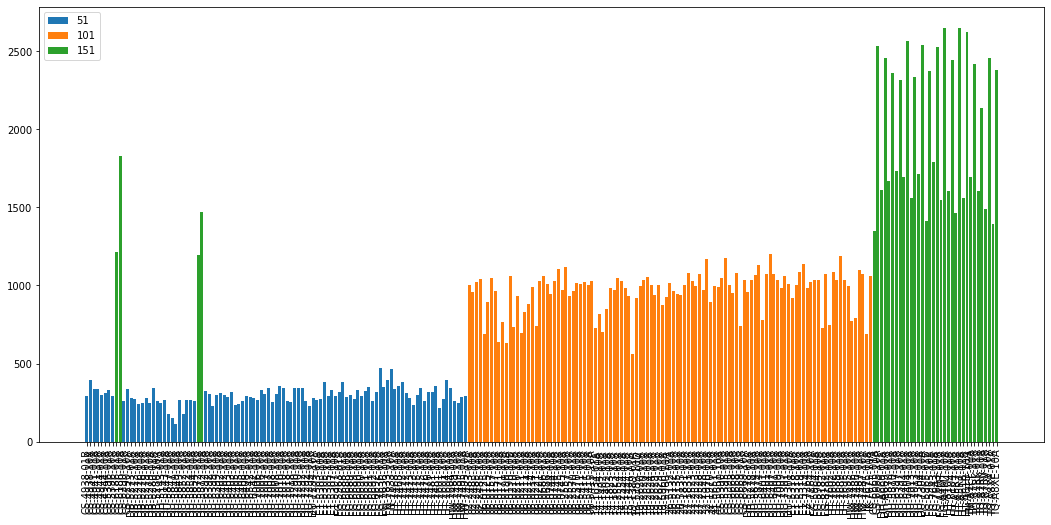

In [53]:
groups = cm.groupby('raw read length')
fig, ax = plt.subplots()
plt.xticks(rotation=90)
for name, group in groups:
    ax.bar(group['sample'],group['normalized'], label=name)
ax.legend()
plt.show()